In [37]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [38]:
df = pl.read_parquet("../reddit_posts_rated.parquet")
df

id,author,created_utc,subreddit,title,selftext,media_embed,media,url,local_thumbnail_path,mean_rating,median_rating,rating_stdev,weighted_rating,rating_count
str,str,i64,str,str,str,struct[5],struct[3],str,str,f32,f32,f32,f64,u32
"""6um2bk""","""Josh_norman05""",1503103734,"""truerateme""","""[21M] Rateme, I'm 6'1"" and 200…","""""","{""&lt;iframe class=""embedly-embed"" src=""//cdn.embedly.com/widgets/media.html?src=%2F%2Fimgur.com%2Fa%2Fv2xU7%2Fembed&amp;url=http%3A%2F%2Fimgur.com%2Fa%2Fv2xU7&amp;image=http%3A%2F%2Fi.imgur.com%2FpCLxBv8.jpg%3Ffb&amp;key=522baf40bd3911e08d854040d3dc5c07&amp;type=text%2Fhtml&amp;schema=imgur"" width=""550"" height=""550"" scrolling=""no"" frameborder=""0"" allowfullscreen&gt;&lt;/iframe&gt;"",550,null,false,550}","{{null,""Imgur: The most awesome images on the Internet."",550,""&lt;iframe class=""embedly-embed"" src=""//cdn.embedly.com/widgets/media.html?src=%2F%2Fimgur.com%2Fa%2Fv2xU7%2Fembed&amp;url=http%3A%2F%2Fimgur.com%2Fa%2Fv2xU7&amp;image=http%3A%2F%2Fi.imgur.com%2FpCLxBv8.jpg%3Ffb&amp;key=522baf40bd3911e08d854040d3dc5c07&amp;type=text%2Fhtml&amp;schema=imgur"" width=""550"" height=""550"" scrolling=""no"" frameborder=""0"" allowfullscreen&gt;&lt;/iframe&gt;"",""Imgur"",""http://imgur.com"",315,""http://i.imgur.com/pCLxBv8.jpg?fb"",600,""Imgur: The most awesome images on the Internet"",""rich"",null,""1.0"",550,null,null},""imgur.com"",null}","""http://imgur.com/a/v2xU7""","""thumbnails/6um2bk.jpg""",6.777778,7.0,1.141849,6.838235,9
"""6umpik""","""PettingXu""",1503111646,"""truerateme""","""M23 tear me a new one guys""","""""","{""&lt;iframe class=""embedly-embed"" src=""//cdn.embedly.com/widgets/media.html?src=%2F%2Fimgur.com%2Fa%2F2loQ6%2Fembed&amp;url=https%3A%2F%2Fimgur.com%2Fa%2F2loQ6&amp;image=http%3A%2F%2Fi.imgur.com%2F7HP3ftQ.jpg%3Ffb&amp;key=522baf40bd3911e08d854040d3dc5c07&amp;type=text%2Fhtml&amp;schema=imgur"" width=""550"" height=""550"" scrolling=""no"" frameborder=""0"" allowfullscreen&gt;&lt;/iframe&gt;"",550,null,false,550}","{{null,""Imgur: The most awesome images on the Internet."",550,""&lt;iframe class=""embedly-embed"" src=""//cdn.embedly.com/widgets/media.html?src=%2F%2Fimgur.com%2Fa%2F2loQ6%2Fembed&amp;url=https%3A%2F%2Fimgur.com%2Fa%2F2loQ6&amp;image=http%3A%2F%2Fi.imgur.com%2F7HP3ftQ.jpg%3Ffb&amp;key=522baf40bd3911e08d854040d3dc5c07&amp;type=text%2Fhtml&amp;schema=imgur"" width=""550"" height=""550"" scrolling=""no"" frameborder=""0"" allowfullscreen&gt;&lt;/iframe&gt;"",""Imgur"",""http://imgur.com"",315,""http://i.imgur.com/7HP3ftQ.jpg?fb"",600,""Reddit Rateme"",""rich"",null,""1.0"",550,null,null},""m.imgur.com"",null}","""https://m.imgur.com/a/2loQ6""","""thumbnails/6umpik.jpg""",7.104167,7.125,0.532197,7.235632,8
"""6un283""","""Mr-Rushifa""",1503116342,"""truerateme""","""[22M] 6'6"" Was told to post he…","""""","{""&lt;iframe class=""embedly-embed"" src=""//cdn.embedly.com/widgets/media.html?src=%2F%2Fimgur.com%2Fa%2FD0rJP%2Fembed&amp;url=https%3A%2F%2Fimgur.com%2Fa%2FD0rJP&amp;image=http%3A%2F%2Fi.imgur.com%2FHkIQCm5.jpg%3Ffb&amp;key=2aa3c4d5f3de4f5b9120b660ad850dc9&amp;type=text%2Fhtml&amp;schema=imgur"" width=""550"" height=""550"" scrolling=""no"" frameborder=""0"" allowfullscreen&gt;&lt;/iframe&gt;"",550,null,false,550}","{{null,""Imgur: The most awesome images on the Internet."",550,""&lt;iframe class=""embedly-embed"" src=""//cdn.embedly.com/widgets/media.html?src=%2F%2Fimgur.com%2Fa%2FD0rJP%2Fembed&amp;url=https%3A%2F%2Fimgur.com%2Fa%2FD0rJP&amp;image=http%3A%2F%2Fi.imgur.com%2FHkIQCm5.jpg%3Ffb&amp;key=2aa3c4d5f3de4f5b9120b660ad850dc9&amp;type=text%2Fhtml&amp;schema=imgur"" width=""550"" height=""550"" scrolling=""no"" frameborder=""0"" allowfullscreen&gt;&lt;/iframe&gt;"",""Imgur"",""http://imgur.com"",315,""http://i.imgur.com/HkIQCm5.jpg?fb"",600,""Gallery"",""rich"",null,""1.0"",550,null,null},""imgur.com"",null}","""https://imgur.com/a/D0rJP""","""thumbnails/6un283.jpg""",8.814661,9.0,0.68085,8.543662,22
"""6un2v8""","""mindmonkey00""",15031

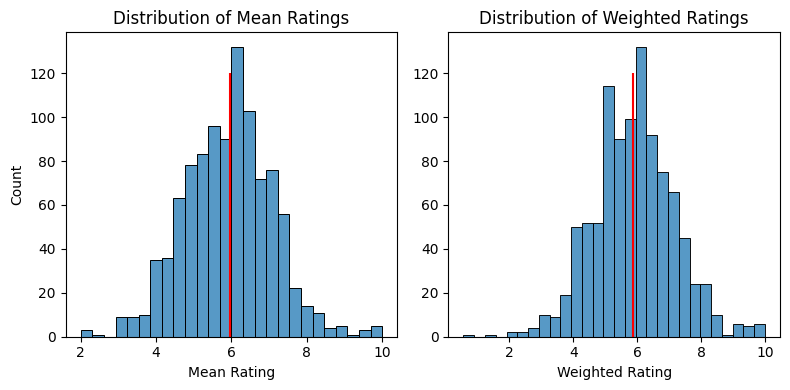

In [48]:
# side by side figs
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

sns.histplot(df["mean_rating"].to_list(), ax=axs[0])
axs[0].set_title("Distribution of Mean Ratings")
axs[0].set_xlabel("Mean Rating")
axs[0].set_ylabel("Count")
axs[0].vlines(np.nanmedian(df["mean_rating"].to_list()), 0, 120, color="red")

sns.histplot(df["weighted_rating"].to_list(), ax=axs[1])
axs[1].set_title("Distribution of Weighted Ratings")
axs[1].set_xlabel("Weighted Rating")
axs[1].set_ylabel("")
axs[1].vlines(np.nanmedian(df["weighted_rating"].to_list()), 0, 120, color="red")

plt.tight_layout()
plt.savefig("../.github/weighted_rating_distribution.png")

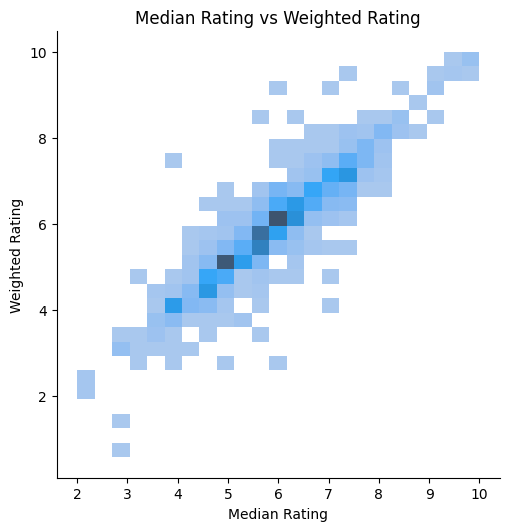

In [40]:
sns.displot(x=df["median_rating"].to_list(), y=df["weighted_rating"].to_list())
plt.title("Median Rating vs Weighted Rating")
plt.xlabel("Median Rating")
plt.ylabel("Weighted Rating")
plt.savefig("../.github/median_vs_weighted_rating.png")

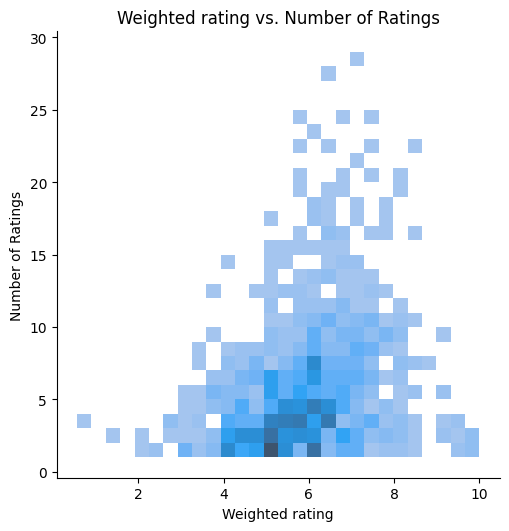

In [41]:
sns.displot(x=df["weighted_rating"].to_list(), y=df["rating_count"].to_list())
plt.title("Weighted rating vs. Number of Ratings")
plt.xlabel("Weighted rating")
plt.ylabel("Number of Ratings")
plt.savefig("../.github/weighted_rating_vs_rating_count.png")